<a href="https://colab.research.google.com/github/waltz47/Fruits-Fresh-or-Rotten-Classification/blob/main/cnn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
!pip install kaggle
import keras
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%cd /content/gdrive/MyDrive/dataset/

/content/gdrive/MyDrive/dataset


Download and unzip data set from kaggle (https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification)

In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/dataset/"
# !kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

In [ ]:
# !unzip fruits-fresh-and-rotten-for-classification.zip

In [4]:
%cd dataset/dataset

/content/gdrive/MyDrive/dataset/dataset/dataset


Creating the CNN.

In [10]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Dropout(.3))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(Dropout(.3))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(6, activation = 'softmax'))

In [11]:
classifier.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

Create an object of ImageDataGenerator, for augmenting training set

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

##apply image augmentation on train set by resizing all images to 64x64 and creating batches of 32 images.
train_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

##apply image augmentation on test set by resizing all images to 64x64 and creating batches of 32 images.
test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


Train the model on the augmented dataset


In [13]:
hist = classifier.fit(train_set,
                         steps_per_epoch = train_set.samples/32,
                         epochs = 15,
                         validation_data = test_set,
                         validation_steps = (test_set.samples/32), use_multiprocessing=True, workers=16)


Epoch 1/15
340/340 [==============================] - 232s 574ms/step - loss: 1.1373 - accuracy: 0.5698 - val_loss: 0.9433 - val_accuracy: 0.7557
Epoch 2/15
340/340 [==============================] - 58s 163ms/step - loss: 0.6718 - accuracy: 0.7717 - val_loss: 0.6798 - val_accuracy: 0.8414
Epoch 3/15
340/340 [==============================] - 60s 168ms/step - loss: 0.5291 - accuracy: 0.8223 - val_loss: 0.6454 - val_accuracy: 0.8106
Epoch 4/15
340/340 [==============================] - 59s 165ms/step - loss: 0.4571 - accuracy: 0.8443 - val_loss: 0.5319 - val_accuracy: 0.8688
Epoch 5/15
340/340 [==============================] - 67s 188ms/step - loss: 0.4061 - accuracy: 0.8606 - val_loss: 0.4532 - val_accuracy: 0.8814
Epoch 6/15
340/340 [==============================] - 58s 162ms/step - loss: 0.3841 - accuracy: 0.8744 - val_loss: 0.4421 - val_accuracy: 0.8881
Epoch 7/15
340/340 [==============================] - 59s 167ms/step - loss: 0.3568 - accuracy: 0.8787 - val_loss: 0.3932 - val_a

Plot train and test loss

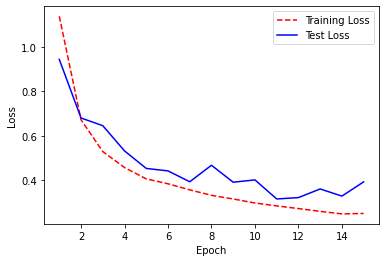

In [14]:
training_loss = hist.history['loss']
test_loss = hist.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Plot train and test accuracy

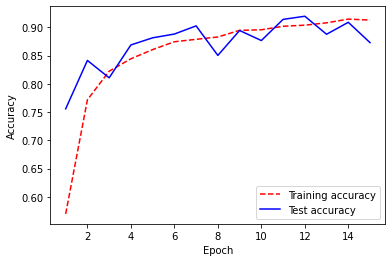

In [15]:
training_accuracy = hist.history['accuracy']
test_accuracy = hist.history['val_accuracy']
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

Save the model and weights

In [16]:
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")

Load model

In [17]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")


In [18]:
loaded_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
output = loaded_model.evaluate(test_set)
print(output)

85/85 [==============================] - 13s 153ms/step - loss: 0.3928 - accuracy: 0.8729
[0.3927975594997406, 0.8728687763214111]


Function for class prediction

In [19]:
arr = ["fresh apple", "fresh banana", "fresh orange", "rotten apples", 
       "rotten banana", "rotten orange"]
def pred_class(path):
  display(Image(path, width=150, height=150))
  test_image = tf.keras.utils.load_img(path, target_size = (64, 64))
  test_image = tf.keras.utils.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = loaded_model.predict(test_image)
  res = np.argmax(result, axis = 1)[:][0]
  print(arr[res])

In [20]:
train_set.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

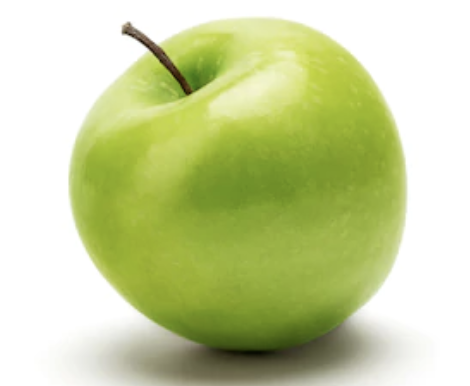

1/1 [==============================] - 0s 135ms/step
fresh apple


In [21]:
pred_class('test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png')

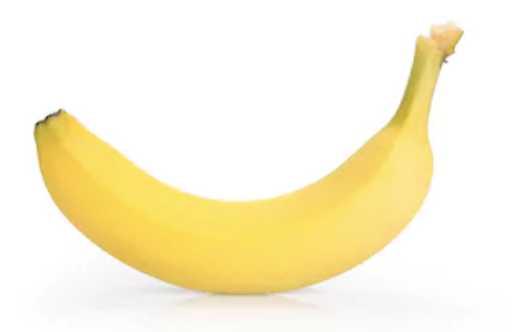

1/1 [==============================] - 0s 18ms/step
fresh banana


In [22]:
pred_class('test/freshbanana/Screen Shot 2018-06-12 at 10.00.37 PM.png')

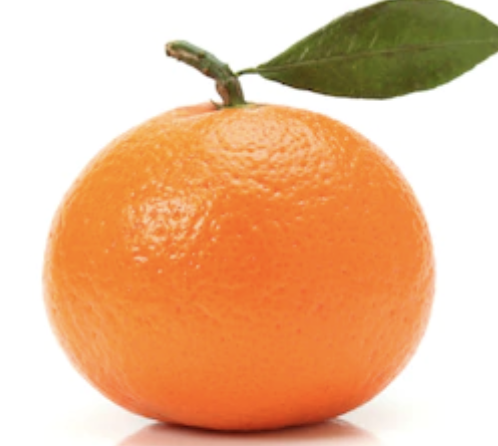

1/1 [==============================] - 0s 17ms/step
fresh orange


In [23]:
pred_class('test/freshoranges/Screen Shot 2018-06-12 at 11.50.14 PM.png')

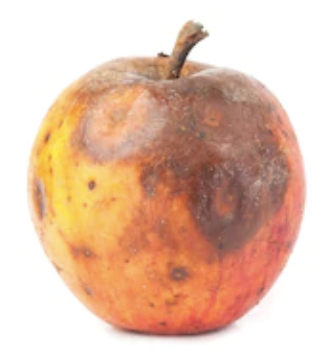

1/1 [==============================] - 0s 17ms/step
rotten apples


In [24]:
pred_class('test/rottenapples/Screen Shot 2018-06-07 at 2.15.34 PM.png')

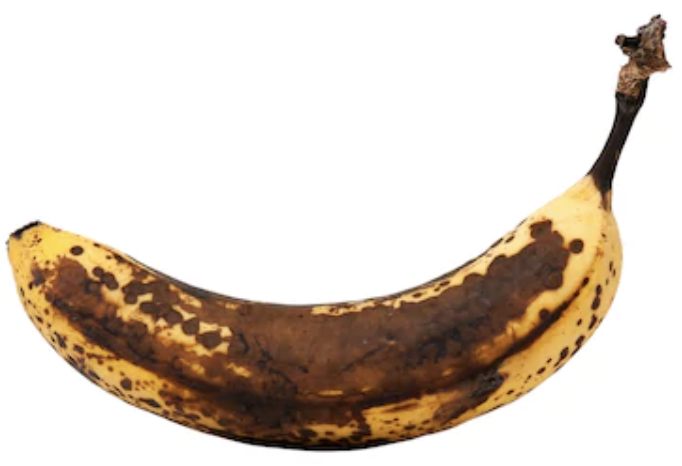

1/1 [==============================] - 0s 20ms/step
rotten banana


In [25]:
pred_class('test/rottenbanana/Screen Shot 2018-06-12 at 8.47.41 PM.png')

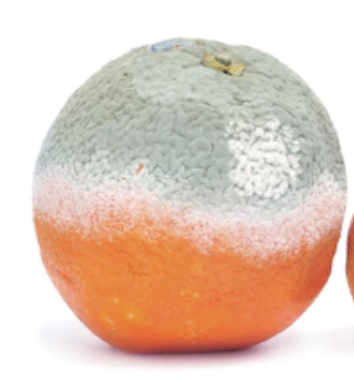

1/1 [==============================] - 0s 18ms/step
rotten orange


In [26]:
pred_class('test/rottenoranges/Screen Shot 2018-06-12 at 11.18.34 PM.png')

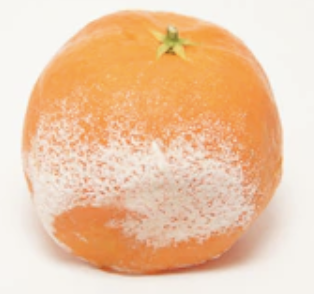

1/1 [==============================] - 0s 23ms/step
rotten orange


In [27]:
pred_class('test/rottenoranges/Screen Shot 2018-06-12 at 11.26.36 PM.png')